# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [253]:
#!pip3 install wordcloud

In [254]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [255]:
# Use this space for any additional import statements you need

import numpy as np

import spacy

from spacy.tokenizer import Tokenizer
from spacy.util import compile_prefix_regex, compile_infix_regex, compile_suffix_regex 

nlp = spacy.load('en_core_web_sm')

import string
from pprintpp import pprint

In [256]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here

    if isinstance(tokens, str):     # get tokens
        tokens = tokenize(tokens) 
    else:
        tokens = tokens      
    
    x = np.array(tokens)            # convert token list to np array for unique function
    num_uniq = len(np.unique(x))
    
    test_chars = "".join(tokens)    # join list strings for char count

    # Lexical diversity
    ttr_lex_div = num_uniq / len(tokens)      # type-token ratio 

    # Most common tokens (top 5)
    common_words = Counter(tokens).most_common(5)    # count token instances then get most common

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(np.unique(x))
    lexical_diversity = ttr_lex_div
    num_characters = len(test_chars)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity}% in the data.")
        # print the five most common tokens
        print(f"The top 5 words in the data, along with their counts, are {common_words}.")
        
    return([num_tokens, 
            num_unique_tokens,
            lexical_diversity,
            num_characters,
            common_words])

    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    stop_words = spacy.lang.en.STOP_WORDS                        # load stop words

    potential_stop_words = [ '', 'im', 'like',                   
                            'dont', 'got', 'cause',              # added extra stop words
                            'wanna', 'youre']
    
    for wrd in potential_stop_words:
        stop_words.add(wrd)

    removed = [w for w in tokens if not w in stop_words]         # remove stop words
    return(removed)

 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    collapse_whitespace = re.compile(r'\s+')
    return([item.lower() for item in collapse_whitespace.split(text)])  # using Module 2
    
def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [257]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "/Users/dunya/Desktop/mod3"
twitter_folder = f"{data_location}/twitter/"
lyrics_folder = f"{data_location}/lyrics"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [258]:
twitter_data = pd.read_csv(twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [259]:
twitter_data_2 = pd.read_csv(twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [260]:
# Helper to read text file

def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return f.read()
        
# Function to iterate through all files

def load_songs(artist):
    song_list = []
    path = f"{lyrics_folder}/{artist}/"                          # designate path
    os.chdir(path)  
    for file in os.listdir():
        song_dict = {}
        if file.endswith(".txt"):                                # check for text format
            file_path = f"{path}{file}"
            path_components = file_path.split('/')
            song_dict["title"] = path_components[-1]             # get title from file path
            song_dict["artist"] = path_components[-2]            # get title from file path
            song_dict["lyrics"] = read_text_file(file_path)      # extract lyrics
            song_list.append(song_dict)
    return song_list



In [261]:
# Read in the lyrics data using load_songs function above

artist_names = ["cher", "robyn"]

read_cher = pd.DataFrame(load_songs("cher"))
read_robyn = pd.DataFrame(load_songs("robyn"))

# Convert list of dictionaries to pandas

lyrics_data = pd.concat([read_cher, read_robyn])

## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [262]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline = my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline = my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [263]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [264]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens","num_tokens"]] # added num_tokens

,artist,description,tokens,num_tokens
1738647,cher,Brooklyn-based fashion illustrator. ✨ Check ou...,"[brooklynbased, fashion, illustrator, ✨, check...",12
90403,cher,🎭,[🎭],1
227087,robyn,Taken by damian 27'02'2013 ♥. MJ: Always in my...,"[taken, damian, 27022013, ♥, mj, heart]",6
3827156,cher,🎭 Wuthering Heights @wise_children 🌞stream my ...,"[🎭, wuthering, heights, wisechildren, 🌞stream,...",9
724494,cher,Apasionado del Marketing & Digital @letsrebold...,"[apasionado, del, marketing, digital, letsrebo...",16
209034,cher,🌱,[🌱],1
95631,cher,ᵕ̈ she/her ᵕ̈ ☁︎19☁︎ 💗💛💙,"[ᵕ̈, sheher, ᵕ̈, ☁︎19☁︎, 💗💛💙]",5
596557,cher,Estudiante UAQ 💙🖤💙. Lic. CPYAP. 📚,"[estudiante, uaq, 💙🖤💙, lic, cpyap, 📚]",6
665416,cher,Traveler. Creighton University and University ...,"[traveler, creighton, university, university, ...",14
55938,robyn,"Bas Bleu Company Bas Bleu Leggins, tights, sto...","[bas, bleu, company, bas, bleu, leggins, tight...",16


Let's take a quick look at some of the lyrics data as well.

In [265]:
lyrics_data.sample(10)

,title,artist,lyrics,tokens,num_tokens
164,cher_thegirlfromipanema.txt,cher,"""The Girl From Ipanema""\n\n\n\nTall and tan an...","[girl, ipanema, tall, tan, young, lovely, girl...",75
222,cher_justlikejessejames.txt,cher,"""Just Like Jesse James""\n\n\n\nYou're struttin...","[jesse, james, struttin, town, slingin, gun, s...",168
217,cher_itsacryinshame.txt,cher,"""It's A Cryin' Shame""\n\n\n\nLove walk out the...","[cryin, shame, love, walk, door, cryin, shame,...",114
140,cher_spring.txt,cher,"""Spring""\n\n\n\nIn a broken down apartment hou...","[spring, broken, apartment, house, laid, woman...",133
86,robyn_konichiwabitches.txt,robyn,"""Konichiwa Bitches""\n\n\n\nYou wanna rumble in...","[konichiwa, bitches, rumble, jungle, ill, stam...",148
309,cher_loveonarooftop.txt,cher,"""Love On A Rooftop""\n\n\n\nWe used to talk for...","[love, rooftop, talk, forever, dime, live, fin...",98
298,cher_thebookoflove.txt,cher,"""The Book Of Love""\n\n\n\nIn the book of love ...","[book, love, book, love, come, age, lose, love...",124
92,robyn_herewego.txt,robyn,"""Here We Go""\n\n\n\nI couldn't wait another mi...","[couldnt, wait, minute, baby, minutes, friends...",33
188,cher_youngandpretty.txt,cher,"""Young And Pretty""\n\n\n\nCome from the suburb...","[young, pretty, come, suburbs, city, young, pr...",70
197,cher_blowininthewind.txt,cher,"""Blowin' In The Wind""\n\n\n\nHow many roads mo...","[blowin, wind, roads, man, walk, man, seas, wh...",77


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: As it stands, the tokenization procedure currently includes conversion of the text characters to lowercase, removal of stop words and punctuation, followed by splitting on whitespace. In the previous module assignment I split the text using the native string.split() method. This time I used the regex expression `'\s+'`, provided towards the end of the last assignment. This improves on the white space splitting by dealing with tabs and new lines that may be present as well. Further improvements in tokenization would revolve around stop words. Better understanding of the words contained in the stopwords dictionary imported can be an example of this. In the last module I imported stopwords from spacy using `'spacy.lang.en.STOP_WORDS'`. In my output towards the end of the assignment I noticed that words like `'got'` and `'I'm'` were not there. Regarding lyrics data, sometime those stopwords may be slang. Looking through the most common Eminem words, `'ain't'` came up in the top 5. Since this word is a contraction for `'is not'` or `'am not'` it can be a stopword. In conclusion, depending on the use-cases, carefully deciding on what should be condsidered a stopword could lead to improvements in tokenization.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [266]:
# Calculate descriptive statistics

# Get all lyrics by artist
cher_lyrics = lyrics_data[lyrics_data["artist"] == "cher"]
robyn_lyrics = lyrics_data[lyrics_data["artist"] == "robyn"]

# Combine token lists into one
cher_tokens = np.concatenate( cher_lyrics["tokens"] , axis=0 )
robyn_tokens = np.concatenate( robyn_lyrics["tokens"] , axis = 0 )

# Call descriptive_stats
print(descriptive_stats(cher_tokens))
print("\n")
print(descriptive_stats(robyn_tokens))
print("\n")
print("Number of Cher Songs: ", len(cher_lyrics))
print("Number of Robyn Songs: ", len(robyn_lyrics))


There are 28157 tokens in the data.
There are 3578 unique tokens in the data.
There are 138880 characters in the data.
The lexical diversity is 0.1270731967184004% in the data.
The top 5 words in the data, along with their counts, are [('love', 1004), ('know', 486), ('time', 319), ('baby', 319), ('oh', 306)].
[28157, 3578, 0.1270731967184004, 138880, [('love', 1004), ('know', 486), ('time', 319), ('baby', 319), ('oh', 306)]]


There are 11655 tokens in the data.
There are 2058 unique tokens in the data.
There are 58940 characters in the data.
The lexical diversity is 0.17657657657657658% in the data.
The top 5 words in the data, along with their counts, are [('know', 308), ('love', 275), ('baby', 222), ('dance', 150), ('beat', 146)].
[11655, 2058, 0.17657657657657658, 58940, [('know', 308), ('love', 275), ('baby', 222), ('dance', 150), ('beat', 146)]]


Number of Cher Songs:  316
Number of Robyn Songs:  104


Q: what observations do you make about these data? 

A: Based on the initial descriptive statistics I noticed that Cher has more than two times as many tokens in her songs than Robyn, with 1.5 times as many unique tokens. The amount of characters used by Cher is nearly 2.5 times greater than Robyn as well. Given this large difference, it is surprising that Robyn's lexical diversity is 5% greater than Cher's. With the large token related differences in mind, I printed out the amount of songs for each artist. Knowing Cher has 316 songs while Robyn has 104 allows us to better understand why those differences exist. It is interesting to see that the words `"love"` and `"know"` are the two most common words used by both artists, with the word `"baby"` falling into their top 5s as well. 


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [267]:

# Get word counts for each artist

cher_word_list = Counter(cher_tokens).most_common()
robyn_word_list = Counter(robyn_tokens).most_common()

# Function to convert word count list to dictionary

def convert_to_dictionary(tup, di):
    di = dict(tup)
    return di
     
# Process word conversions

cher_empty = {}
robyn_empty = {}

cher_word_dictionary = convert_to_dictionary(cher_word_list, cher_empty)
robyn_word_dictionary = convert_to_dictionary(robyn_word_list, robyn_empty)

# Function to get top 5 words and counts in song

def top_5(tokens):
    top = Counter(tokens).most_common(5)

    empty = {}
    top_dict = convert_to_dictionary(top, empty)
    return top_dict

# Function to calculate word concentrations in song

def get_highest_concentration(dictionary, artist_dictionary):
    words = list(dictionary.keys())         # get words
    highest = 0                             # init concentration comparison
    best_word = words[0]                    # init word to place

    for word in words:
        if artist_dictionary[word] < 5:     # check corpus appearances
            continue
        else:
            concentration = dictionary[word] / artist_dictionary[word]  # calc concentration
            if concentration > highest:
                highest = concentration     # compare and replace top word
                best_word = word
    return {"word": best_word,              # return relevant analysis values
            "concentration": highest,
            "song_appearances": dictionary[best_word],
            "corpus_appearances": artist_dictionary[best_word]}


In [268]:
# Helpers to add dataframe columns

def get_word(dictionary):
    return dictionary["word"]

def get_concentration(dictionary):
    return dictionary["concentration"]

def get_song_appearances(dictionary):
    return dictionary["song_appearances"]

def get_corpus_appearances(dictionary):
    return dictionary["corpus_appearances"]

# Calculate concentration for top words in song for artists dataframes

robyn_data = robyn_lyrics.copy()
robyn_data["top_5"] = robyn_data["tokens"].apply(top_5)
robyn_data["highest_concentration"] = robyn_data["top_5"].apply(get_highest_concentration, args=(robyn_word_dictionary,))

cher_data = cher_lyrics.copy()
cher_data["top_5"] = cher_data["tokens"].apply(top_5)
cher_data["highest_concentration"] = cher_data["top_5"].apply(get_highest_concentration, args=(cher_word_dictionary,))

# Add new values to dataframe

robyn_data["most_concentrated"] = robyn_data["highest_concentration"].apply(get_word)
robyn_data["word_concentration"] = robyn_data["highest_concentration"].apply(get_concentration)
robyn_data["song_count"] = robyn_data["highest_concentration"].apply(get_song_appearances)
robyn_data["corpus_count"] = robyn_data["highest_concentration"].apply(get_corpus_appearances)

cher_data["most_concentrated"] = cher_data["highest_concentration"].apply(get_word)
cher_data["word_concentration"] = cher_data["highest_concentration"].apply(get_concentration)
cher_data["song_count"] = cher_data["highest_concentration"].apply(get_song_appearances)
cher_data["corpus_count"] = cher_data["highest_concentration"].apply(get_corpus_appearances)

### Dataframes by descending corpus count

In [269]:
# Sort by descending corpus count {Cher}

cher_corpus = cher_data.sort_values('corpus_count', ascending=False)
display(cher_corpus[["most_concentrated", "word_concentration", "song_count", "corpus_count"]].head(10))

,most_concentrated,word_concentration,song_count,corpus_count
79,gonna,0.072072,16,222
245,want,0.097143,17,175
306,walk,0.118644,14,118
179,walk,0.211864,25,118
104,need,0.026316,3,114
130,need,0.035088,4,114
256,gotta,0.120370,13,108
37,look,0.018692,2,107
297,home,0.371429,39,105
267,gone,0.100000,10,100


In [270]:
# Sort by descending corpus count {Robyn}

robyn_corpus = robyn_data.sort_values('corpus_count', ascending=False)
display(robyn_corpus[["most_concentrated", "word_concentration", "song_count", "corpus_count"]].head(10))

,most_concentrated,word_concentration,song_count,corpus_count
75,killing,0.500000,68,136
53,killing,0.500000,68,136
99,want,0.033333,4,120
30,want,0.233333,28,120
100,come,0.069444,5,72
9,theres,0.086207,5,58
71,set,0.977778,44,45
19,wont,0.073171,3,41
67,life,0.358974,14,39
84,hang,0.289474,11,38


### Dataframes by descending word concentrations

In [271]:
# Sort by descending word concentration {Cher}

cher_concentration = cher_data.sort_values('word_concentration', ascending=False)
display(cher_concentration[["most_concentrated", "word_concentration", "song_count", "corpus_count"]].head(10))

,most_concentrated,word_concentration,song_count,corpus_count
221,favorite,1.0,12,12
230,eden,1.0,7,7
196,apples,1.0,7,7
208,couldve,1.0,19,19
215,brass,1.0,6,6
63,rhymney,1.0,5,5
219,carousel,1.0,14,14
220,tu,1.0,9,9
118,homeward,1.0,7,7
56,travis,1.0,12,12


In [272]:
# Sort by descending word concentration {Robyn}

robyn_concentration = robyn_data.sort_values('word_concentration', ascending=False)
display(robyn_concentration[["most_concentrated", "word_concentration", "song_count", "corpus_count"]].head(10))

,most_concentrated,word_concentration,song_count,corpus_count
0,include,1.0,19,19
18,human,1.0,13,13
21,chica,1.0,16,16
82,handle,1.0,18,18
91,uh,1.0,6,6
37,older,1.0,7,7
40,brokenhearted,1.0,11,11
79,88,1.0,14,14
45,moneyman,1.0,11,11
46,jack,1.0,25,25


### Dataframes by descending word concentration, omitting 100% values

In [273]:
# Sort by descending word concentration, omitting 100% concentration {Cher}

cher_not_100 = cher_data[cher_data["word_concentration"] < 1]
cher_not_100 = cher_not_100.sort_values('word_concentration', ascending=False).head(10)
display(cher_not_100[["most_concentrated", "word_concentration", "song_count", "corpus_count"]])

,most_concentrated,word_concentration,song_count,corpus_count
64,mirror,0.956522,22,23
103,perfection,0.947368,18,19
81,shape,0.941176,16,17
158,outrageous,0.941176,16,17
43,main,0.937500,15,16
53,runnin,0.925926,25,27
68,s,0.923077,12,13
194,wood,0.916667,11,12
76,womans,0.916667,33,36
265,moneys,0.900000,9,10


In [274]:
# Sort by descending word concentration, omitting 100% concentration {Robyn}

robyn_not_100 = robyn_data[robyn_data["word_concentration"] < 1]
robyn_not_100 = robyn_not_100.sort_values('word_concentration', ascending=False).head(10)
display(robyn_not_100[["most_concentrated", "word_concentration", "song_count", "corpus_count"]])

,most_concentrated,word_concentration,song_count,corpus_count
71,set,0.977778,44,45
2,beach,0.933333,14,15
89,shake,0.888889,16,18
94,honey,0.875000,14,16
31,reasons,0.833333,5,6
64,forgive,0.812500,13,16
29,ride,0.800000,4,5
74,truth,0.800000,12,15
72,fire,0.800000,8,10
4,machine,0.800000,4,5


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: The 6 dataframes above show the top 10 values of the highest concentrated token in each song for a given artist. They are organized in descending order based on two different attributes, `"word_concentration"` and `"corpus_count"`. The first two dataframes are organized by descending corpus count. Words like `"walk"` and `"need"` seem to be the highest concentrated word in multiple Cher songs, while words like `"killing"` and `"want"` are the highest concentrated word in multiple Robyn songs. This makes sense given the high corpus counts associated with them. The following two dataframes are organized by descending word_concentration. These dataframes show us words that appear in a single song written by an artist, without coming up anywhere else. The last two dataframes omit those 'sole proprietor' song-word relationships and provide a slightly more interesting picture of word concentrations, with highly concentrated words that appear in other songs as well. An interesting observation from the Cher dataframe is the letter `"s"`, which appears 12 times in a single song but once more somewhere else based on the corpus count of 13. It could be that one of the songs has the term `"S.O.S."`, but it could also indicate that the tokenization method could use some more work. None of the top 5 words of a given artist come up in any of these dataframes. Although it is surprising at first, it makes sense given the very high corpus counts associated with those words (ranging from 150 to 1000 overall appearances).

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [275]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

# wordcloud = WordCloud(font_path='/Library/Fonts/Arial.ttf').generate(text)
    wc = WordCloud(font_path='arial.ttf',
                   width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

### Barplots for lyrics

<BarContainer object of 50 artists>

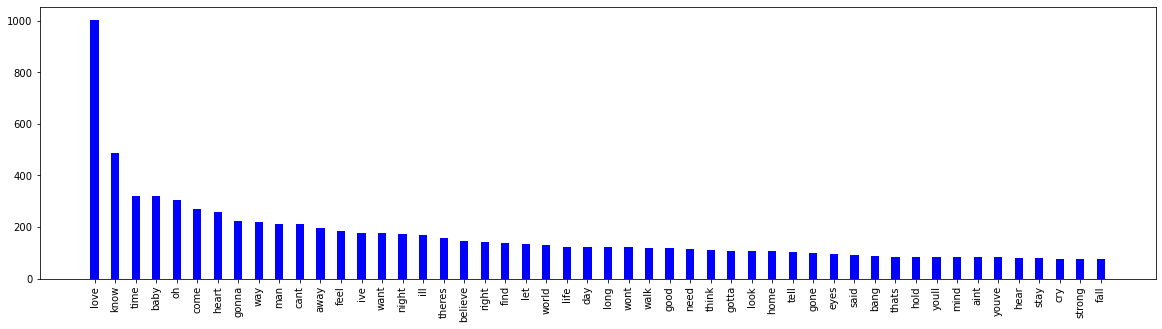

In [276]:
# Get top 50 words {Cher}
cher_words = list(cher_word_dictionary.keys())
cher_50w = cher_words[0:50]
cher_values = list(cher_word_dictionary.values())
cher_50v = cher_values[0:50]

# Plot graph
fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation='vertical')
plt.bar(cher_50w, cher_50v, color ='blue', width = 0.4)


<BarContainer object of 50 artists>

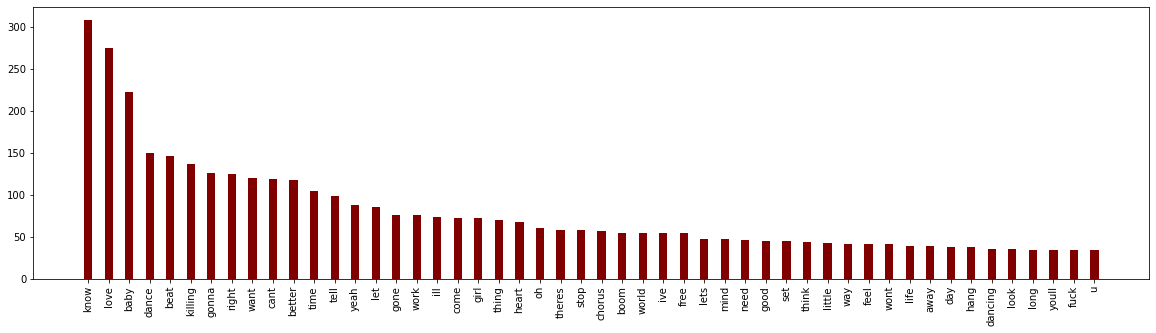

In [277]:
# Get top 50 words {Robyn}
robyn_words = list(robyn_word_dictionary.keys())
robyn_50w = robyn_words[0:50]
robyn_values = list(robyn_word_dictionary.values())
robyn_50v = robyn_values[0:50]

# Plot graph
fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation='vertical')
plt.bar(robyn_50w, robyn_50v, color ='maroon', width = 0.4)


In [278]:
# Create dataframes for each artists twitter descriptions

# Get all descriptions by artist
cher_tweets = twitter_data[twitter_data["artist"] == "cher"]
robyn_tweets = twitter_data[twitter_data["artist"] == "robyn"]

# Combine token lists into one
cher_tokens_t = np.concatenate( cher_tweets["tokens"] , axis = 0 )
robyn_tokens_t = np.concatenate( robyn_tweets["tokens"] , axis = 0 )

cher_word_list_twitter = Counter(cher_tokens_t).most_common()
robyn_word_list_twitter = Counter(robyn_tokens_t).most_common()
     
# Process word conversions
cher_empty_t = {}
robyn_empty_t = {}

cher_tweet_dictionary = convert_to_dictionary(cher_word_list_twitter, cher_empty_t)
robyn_tweet_dictionary = convert_to_dictionary(robyn_word_list_twitter, robyn_empty_t)

### Barplots for twitter descriptions

<BarContainer object of 50 artists>

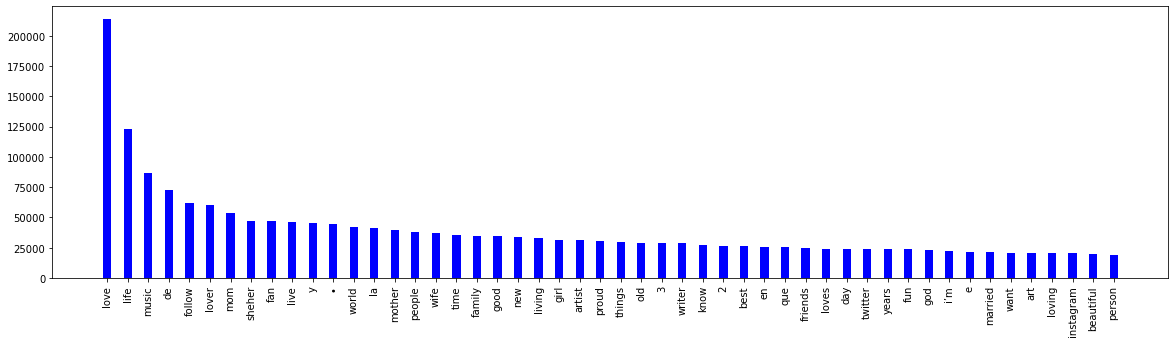

In [279]:
# Get top 50 values {Cher}
cher_words_t = list(cher_tweet_dictionary.keys())
cher_50w_t = cher_words_t[1:51]                         #   adjusted range to exclude 'nan'
cher_values_t = list(cher_tweet_dictionary.values())
cher_50v_t = cher_values_t[1:51]                        #   adjusted range to exclude 'nan'

# Plot graph
fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation='vertical')
plt.bar(cher_50w_t, cher_50v_t, color ='blue', width = 0.4)

<BarContainer object of 50 artists>

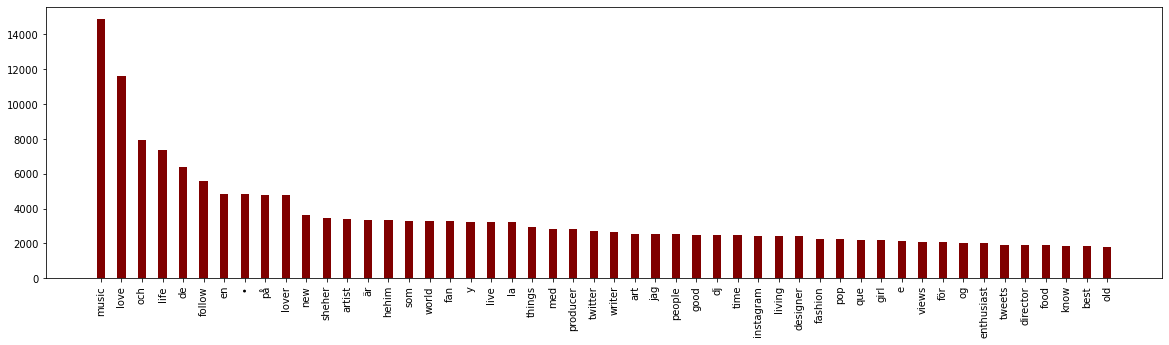

In [280]:
# Get top 50 values {Robyn}
robyn_words_t = list(robyn_tweet_dictionary.keys())
robyn_50w_t = robyn_words_t[1:51]
robyn_values_t = list(robyn_tweet_dictionary.values())
robyn_50v_t = robyn_values_t[1:51]

# Plot graph
fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation='vertical')
plt.bar(robyn_50w_t, robyn_50v_t, color ='maroon', width = 0.4)

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: My initial observations about the relatively straightforward wordclouds is that constructing them was not very straightforward, hence the bar graphs above. My biggest error dealing with the wordcloud function was that it could not process non-true form values. After hours of Googling and Stack-Overflowing it turns out the error arises with Python versions higher than 3.6. I attempted installling older versions using pip and conda commands, using the conda-forge library, adding trueform text files (.ttf) to try and use, importing freetype packages, importing different versions of the pillow package, and trying to use a library called wordcloud2 (which was unfortunately deprecated). As a result I decided to construct 4 barplots of the top words using the code above. Based on those barplots the top 5-10 words greatly outweigh other common words. If these words were illustrated in a wordcloud I am sure they would stand out in size, instantly attracting the viewers attention. Since this is not a wordcloud but a pretty basic graph, the words do not have that same effect. Since the example code for the wordcloud call indicated a max_word argument of 50, 50 values were used to construct these barplots as well.